In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
FILE_PATH  = '/content/drive/MyDrive/XLA&TGMT/Buổi thực hành số 5/image1.png'

In [26]:
# Đọc ảnh
image = cv2.imread(FILE_PATH,flags=1)

In [27]:
def Image_segmentation_by_kmeans_clustering(img,k,loop):
  img = img.astype(float)
  # Khởi tạo k tâm cụm bằng cách chọn ngẫu nhiên k tâm cụm
  img_flatt = img.reshape(-1,3)
  new_k_center_clustering = img_flatt[np.random.choice(img_flatt.shape[0],k,replace=False)-1]
  k_center_clustering = np.full(new_k_center_clustering.shape,256)
  # Ma trận khoảng cách từ các tâm cụm đến các điểm
  matrix_distance = np.zeros((img.shape[0],img.shape[1],k))
  # Khởi tạo biến đếm vòng lặp
  count_loop = 0
  # Lặp cho đến khi tâm cụm không đổi hoặc quá số vòng lặp quy định trước
  while not np.allclose(k_center_clustering,new_k_center_clustering) and count_loop < loop:
    k_center_clustering = new_k_center_clustering.copy()
    # Tính khoảng cách từ k tâm cụm cho đến các điểm khác
    for i in range(k):
      matrix_distance[:,:,i] = np.linalg.norm(img - k_center_clustering[i].reshape(1,1,3),axis=2)
    matrix_clustering = np.argmin(matrix_distance,axis=2)
    for i in range(k):
      new_k_center_clustering[i] = np.mean(img[matrix_clustering == i],axis=0)
    count_loop +=1
  for i in range(k):
    img[matrix_clustering == i] = np.mean(img[matrix_clustering == i],axis=0)
  return img.astype(np.uint8)

In [28]:
img_segmentation = Image_segmentation_by_kmeans_clustering(image,3,100)

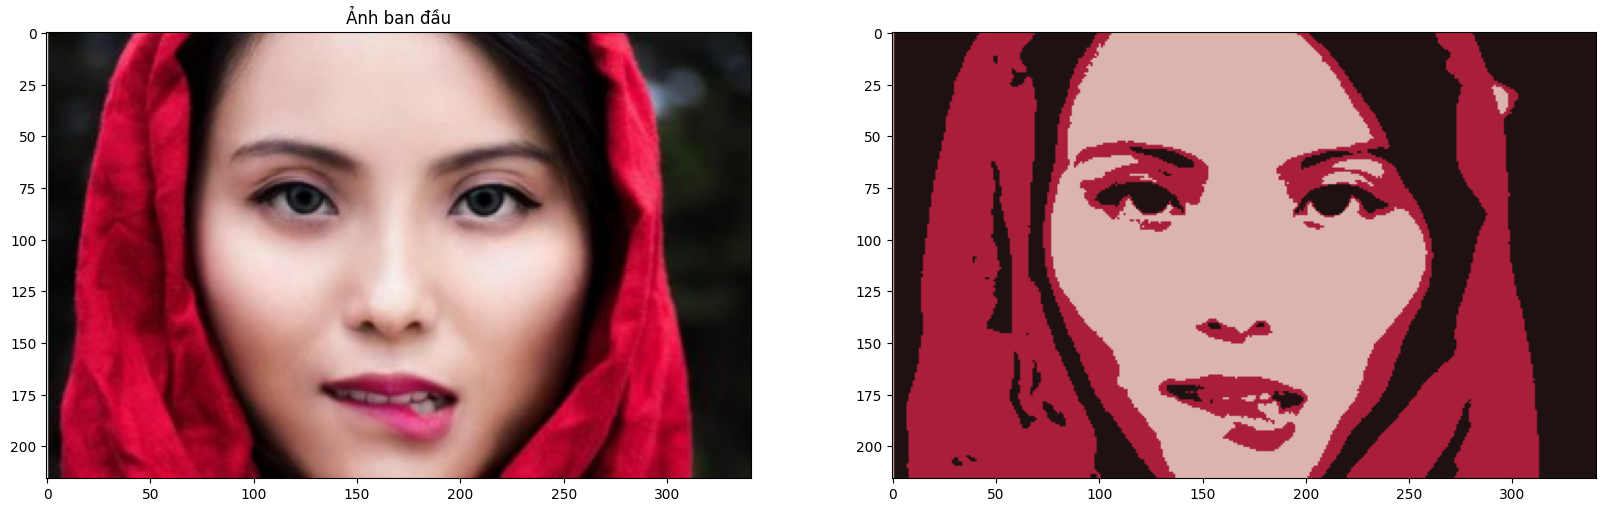

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
# Hiển thị ảnh ban đầu
plt.imshow(image[:,:,::-1])
plt.title("Ảnh ban đầu")
plt.subplot(1,2,2)
# Hiện Thị ảnh sau khi đã phân đoạn

plt.imshow(img_segmentation[:,:,::-1])